In [1]:
# Some path wizardry to make python acknowledge relative paths, just ignore this part...
import sys; sys.path.append('..')
import networkx as nx
from ipysigma import Sigma
from pelote import (
    simmelian_backbone,
    triangular_strength,
    union_of_maximum_spanning_trees,
    global_threshold_sparsification,
    multiscale_backbone,
    graph_to_edges_dataframe,
    graph_to_nodes_dataframe,
    filter_nodes,
    crop_to_largest_connected_component
)
import pandas as pd

In [2]:
graph = nx.read_gml("../../scripts_python_not_git/20221024_network_data.gml", label=None)

In [3]:
graph.order(), graph.size(), nx.density(graph)

(102178, 348127, 3.33447267287765e-05)

In [4]:
graph = graph.to_undirected()

count    102178.000000
mean          6.763765
std          83.371062
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       11873.000000
dtype: float64

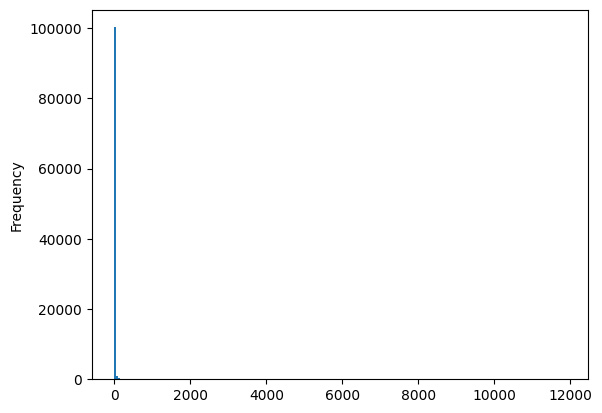

In [5]:
degrees = []
node_look = None
for node, degree in graph.degree():
    degrees.append(degree)
pd.Series(degrees).plot.hist(bins=250)
pd.Series(degrees).describe()

In [6]:
degrees_dict = {}
for node, degree in graph.degree():
    degrees_dict[node] = degree

In [7]:
nx.set_node_attributes(graph, degrees_dict, "degree")
graph_filtered = filter_nodes(graph, lambda n, a: a["degree"] > 2 and a["degree"] < 5000)
graph_filtered.order(), graph_filtered.size(), nx.density(graph_filtered)

(21320, 231754, 0.0010197722842689716)

count    21320.000000
mean        25.879221
std        122.199566
min          3.000000
25%          4.000000
50%          6.000000
75%         14.000000
max       4614.000000
dtype: float64

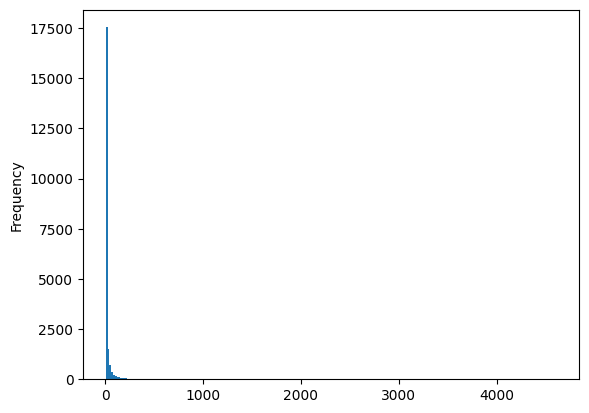

In [8]:
degrees = []
for node, degree in degrees_dict.items():
    if graph_filtered.has_node(node):
        degrees.append(degree)
pd.Series(degrees).plot.hist(bins=250)
pd.Series(degrees).describe()

In [9]:
crop_to_largest_connected_component(graph_filtered)
graph_filtered.order(), graph_filtered.size(), nx.density(graph_filtered)

(21226, 231744, 0.001028780291122395)

In [10]:
Sigma(graph_filtered, node_metrics=['louvain'], node_color='louvain', node_size=graph_filtered.degree)

Sigma(nx.Graph with 21,226 nodes and 231,744 edges)

In [25]:
graph_simmelian = simmelian_backbone(graph_filtered, edge_strength_ranking_threshold=5, edge_redundancy_threshold=2)
graph_simmelian.order(),graph_simmelian.size(), nx.density(graph_simmelian)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



(21226, 52129, 0.0002314160789315768)

In [26]:
crop_to_largest_connected_component(graph_simmelian)
graph_simmelian.order(),graph_simmelian.size(), nx.density(graph_simmelian)

(5103, 51797, 0.003978950898822554)

count    5103.000000
mean       83.200470
std       229.900544
min         3.000000
25%        15.000000
50%        30.000000
75%        68.000000
max      4614.000000
dtype: float64

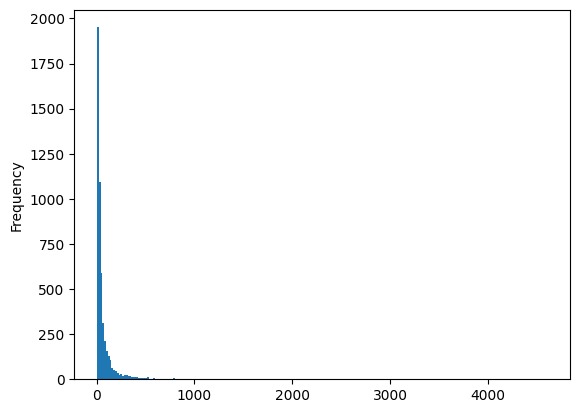

In [27]:
degrees = []
for node, degree in degrees_dict.items():
    if graph_simmelian.has_node(node):
        degrees.append(degree)
pd.Series(degrees).plot.hist(bins=250)
pd.Series(degrees).describe()

In [28]:
Sigma(graph_simmelian, node_metrics=['louvain'], node_color='louvain', node_size=graph_simmelian.degree)

Sigma(nx.Graph with 5,103 nodes and 51,797 edges)

In [15]:
nx.set_edge_attributes(graph_filtered, triangular_strength(graph_filtered, full=True), "weight")
graph_to_edges_dataframe(graph_filtered)

,source,target,weight
0,1,160,0
1,1,211,0
2,1,5897,0
3,3,25,14
4,3,33,29
...,...,...,...
231739,98045,102151,0
231740,98068,98084,0
231741,98332,99769,0
231742,98597,99769,0


In [16]:
graph_global = global_threshold_sparsification(graph_filtered, 3)
graph_global.order(), graph_global.size(), nx.density(graph_global)

(21226, 133126, 0.0005909857646194074)

In [17]:
crop_to_largest_connected_component(graph_global)
graph_global.order(), graph_global.size(), nx.density(graph_global)

(7950, 133115, 0.004212863292799775)

In [18]:
Sigma(graph_global, node_metrics=['louvain'], node_color='louvain', node_size=graph_global.degree)

Sigma(nx.Graph with 7,950 nodes and 133,115 edges)

count    7950.00000
mean       60.06805
std       187.70009
min         4.00000
25%        11.00000
50%        20.00000
75%        45.00000
max      4614.00000
dtype: float64

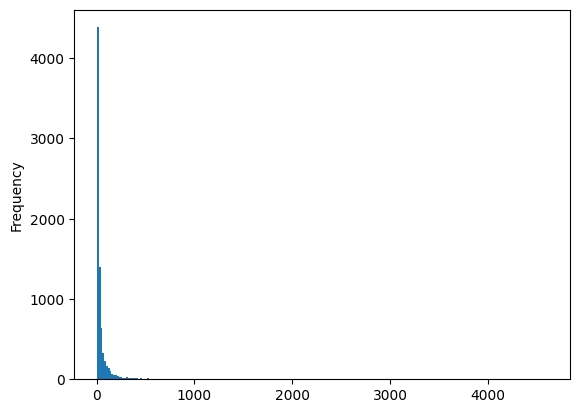

In [19]:
degrees = []
for node, degree in degrees_dict.items():
    if graph_global.has_node(node):
        degrees.append(degree)
pd.Series(degrees).plot.hist(bins=250)
pd.Series(degrees).describe()

In [20]:
edge_att = nx.get_edge_attributes(graph_filtered, "weight")
for k, v in edge_att.items():
    edge_att[k] = v + 1
nx.set_edge_attributes(graph_filtered, edge_att, "weight")
graph_to_edges_dataframe(graph_filtered)

,source,target,weight
0,1,160,1
1,1,211,1
2,1,5897,1
3,3,25,15
4,3,33,30
...,...,...,...
231739,98045,102151,1
231740,98068,98084,1
231741,98332,99769,1
231742,98597,99769,1


In [21]:
graph_multiscale = multiscale_backbone(graph_filtered, 0.05)
graph_multiscale.order(), graph_multiscale.size(), nx.density(graph_multiscale)

(21226, 14879, 6.60522902496294e-05)

In [22]:
crop_to_largest_connected_component(graph_multiscale)
graph_multiscale.order(), graph_multiscale.size(), nx.density(graph_multiscale)

(2444, 14868, 0.004980327238450753)

In [23]:
Sigma(graph_multiscale, node_metrics=['louvain'], node_color='louvain', node_size=graph_multiscale.degree)

Sigma(nx.Graph with 2,444 nodes and 14,868 edges)

count    2444.000000
mean      155.512684
std       317.949002
min         8.000000
25%        41.000000
50%        73.500000
75%       144.000000
max      4614.000000
dtype: float64

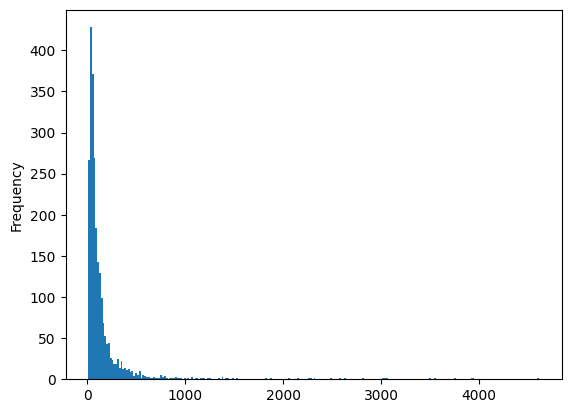

In [24]:
degrees = []
for node, degree in degrees_dict.items():
    if graph_multiscale.has_node(node):
        degrees.append(degree)
pd.Series(degrees).plot.hist(bins=250)
pd.Series(degrees).describe()